In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_fromat = 'retina'

In [8]:
print(f'pandas version : {pd.__version__}')
print(f'seaborn version : {sns.__version__}')
print(f'numpy version : {np.__version__}')

pandas version : 1.4.4
seaborn version : 0.11.2
numpy version : 1.21.5


In [9]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
df = pd.read_csv(url)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
col = df.drop('Outcome',axis=1).columns
X = df[col]
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=7)
estimator = GradientBoostingClassifier(n_estimators=100)

selector = RFE(estimator,n_features_to_select=4,step=1) # select 4 features
selector = selector.fit(X_train,y_train)

In [39]:
selector.support_

array([False,  True, False, False, False,  True,  True,  True])

In [40]:
selector.ranking_

array([2, 1, 3, 5, 4, 1, 1, 1])

In [41]:
selector.n_features_

4

In [42]:
sel_cols = np.array(col)[selector.support_]
sel_cols

array(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [47]:
X = df[sel_cols]
y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=7)
estimator = GradientBoostingClassifier(n_estimators=100)

selector = RFE(estimator,n_features_to_select=4,step=1) # select 4 features
selector = selector.fit(X_train,y_train)

In [50]:
X_train.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
424,151,42.9,0.516,36
282,133,32.4,0.262,37
747,81,46.3,1.096,32
638,97,40.9,0.871,32
621,92,24.2,1.698,28


In [51]:
X_test.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
80,113,22.4,0.140,22
99,122,49.7,0.325,31
333,106,23.6,0.137,44
754,154,32.4,0.443,45
41,133,40.2,0.696,37


In [52]:
model = RandomForestClassifier(n_estimators=100,random_state=777)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(f'feature importances',model.feature_importances_)
print(f'X[selected features] score:{score:.04f}')
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

feature importances [0.3578954  0.22955244 0.22006579 0.19248638]
X[selected features] score:0.7446
[[129  21]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [57]:
fs = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fs

Glucose                     0.357895
BMI                         0.229552
DiabetesPedigreeFunction    0.220066
Age                         0.192486
dtype: float64

<AxesSubplot:>

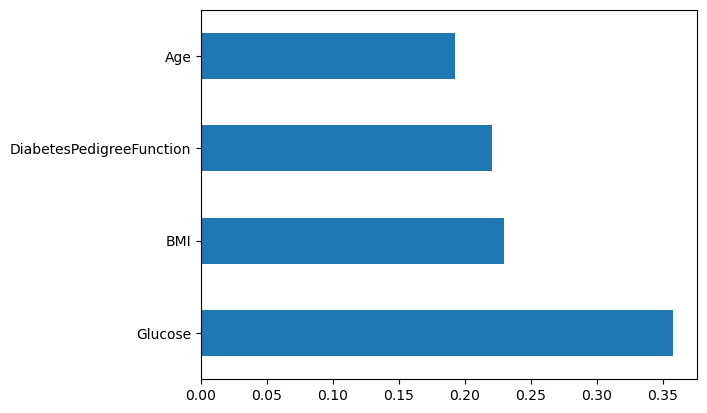

In [59]:
fs.plot(kind='barh')

In [60]:
X = df[col]
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=7)
estimator = GradientBoostingClassifier(n_estimators=100)

selector = RFE(estimator,n_features_to_select=4,step=1) # select 4 features
selector = selector.fit(X_train,y_train)

model = RandomForestClassifier(n_estimators=100,random_state=777)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(f'feature importances',model.feature_importances_)
print(f'X[selected features] score:{score:.04f}')
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

feature importances [0.09320035 0.2471403  0.08177666 0.06958293 0.08954677 0.14764696
 0.13677649 0.13432955]
X[selected features] score:0.7532
[[131  19]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [61]:
fs = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fs

Glucose                     0.247140
BMI                         0.147647
DiabetesPedigreeFunction    0.136776
Age                         0.134330
Pregnancies                 0.093200
Insulin                     0.089547
BloodPressure               0.081777
SkinThickness               0.069583
dtype: float64